In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
df1= pd.read_csv ('/Users/niveditaarvind/Downloads/Life Expectancy Data.csv')



In [4]:
df2=df1.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df2
# drop missing values 



,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [9]:
df2.shape

(1649, 22)

In [11]:
df2.corr('pearson')

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.050771,-0.037092,0.008029,-0.113365,0.069553,0.114897,-0.053822,0.005739,0.010479,-0.016699,0.059493,0.029641,-0.123405,0.096421,0.012567,0.019757,0.014122,0.122892,0.088732
Life expectancy,0.050771,1.000000,-0.702523,-0.169074,0.402718,0.409631,0.199935,-0.068881,0.542042,-0.192265,0.327294,0.174718,0.341331,-0.592236,0.441322,-0.022305,-0.457838,-0.457508,0.721083,0.727630
Adult Mortality,-0.037092,-0.702523,1.000000,0.042450,-0.175535,-0.237610,-0.105225,-0.003967,-0.351542,0.060365,-0.199853,-0.085227,-0.191429,0.550691,-0.255035,-0.015012,0.272230,0.286723,-0.442203,-0.421171
infant deaths,0.008029,-0.169074,0.042450,1.000000,-0.106217,-0.090765,-0.231769,0.532680,-0.234425,0.996906,-0.156929,-0.146951,-0.161871,0.007712,-0.098092,0.671758,0.463415,0.461908,-0.134754,-0.214372
Alcohol,-0.113365,0.402718,-0.175535,-0.106217,1.000000,0.417047,0.109889,-0.050110,0.353396,-0.101082,0.240315,0.214885,0.242951,-0.027113,0.443433,-0.028880,-0.403755,-0.386208,0.561074,0.616975
percentage expenditure,0.069553,0.409631,-0.237610,-0.090765,0.417047,1.000000,0.016760,-0.063071,0.242738,-0.092158,0.128626,0.183872,0.134813,-0.095085,0.959299,-0.016792,-0.255035,-0.255635,0.402170,0.422088
Hepatitis B,0.114897,0.199935,-0.105225,-0.231769,0.109889,0.016760,1.000000,-0.124800,0.143302,-0.240766,0.463331,0.113327,0.588990,-0.094802,0.041850,-0.129723,-0.129406,-0.133251,0.184921,0.215182
Measles,-0.053822,-0.068881,-0.003967,0.532680,-0.050110,-0.063071,-0.124800,1.000000,-0.153245,0.517506,-0.057850,-0.113583,-0.058606,-0.003522,-0.064768,0.321946,0.180642,0.174946,-0.058277,-0.115660
BMI,0.005739,0.542042,-0.351542,-0.234425,0.353396,0.242738,0.143302,-0.153245,1.000000,-0.242137,0.186268,0.189469,0.176295,-0.210897,0.266114,-0.081416,-0.547018,-0.554094,0.510505,0.554844
under-five deaths,0.010479,-0.192265,0.060365,0.996906,-0.101082,-0.092158,-0.240766,0.517506,-0.242137,1.000000,-0.171164,-0.145803,-0.178448,0.019476,-0.100331,0.658680,0.464785,0.462289,-0.148097,-0.226013


In [16]:
new = df2[['Status', 'Life expectancy ','Polio', 'Diphtheria ', 'Hepatitis B', 'Measles ']].copy()

In [17]:
new

,Status,Life expectancy,Polio,Diphtheria,Hepatitis B,Measles
0,Developing,65.0,6.0,65.0,65.0,1154
1,Developing,59.9,58.0,62.0,62.0,492
2,Developing,59.9,62.0,64.0,64.0,430
3,Developing,59.5,67.0,67.0,67.0,2787
4,Developing,59.2,68.0,68.0,68.0,3013
...,...,...,...,...,...,...
2933,Developing,44.3,67.0,65.0,68.0,31
2934,Developing,44.5,7.0,68.0,7.0,998
2935,Developing,44.8,73.0,71.0,73.0,304
2936,Developing,45.3,76.0,75.0,76.0,529


In [18]:
### Vaccine/Life Expectancy/Status 
new.corr ()

,Life expectancy,Polio,Diphtheria,Hepatitis B,Measles
Life expectancy,1.000000,0.327294,0.341331,0.199935,-0.068881
Polio,0.327294,1.000000,0.609245,0.463331,-0.057850
Diphtheria,0.341331,0.609245,1.000000,0.588990,-0.058606
Hepatitis B,0.199935,0.463331,0.588990,1.000000,-0.124800
Measles,-0.068881,-0.057850,-0.058606,-0.124800,1.000000


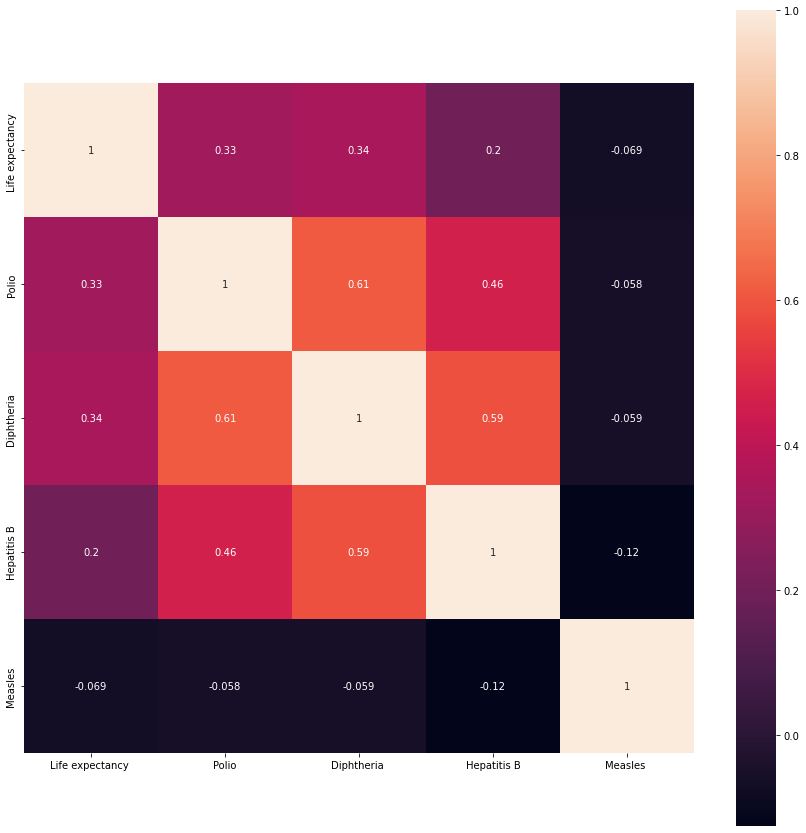

In [19]:
import seaborn as sns
fig = plt.subplots (figsize = (15,15))
sns.heatmap (new.corr (), square = True, cbar = True, annot = True, annot_kws = {'size': 10})
plt.show ()

In [21]:
df_X= new.drop('Life expectancy ', axis=1)

In [23]:
df_y= new["Life expectancy "]

In [24]:
X= df_X
y= df_y

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [141]:
developed.corr()
developing.corr ()

,Life expectancy,Polio,Diphtheria,Hepatitis B,Measles,LE Mean
Life expectancy,1.000000,0.277503,0.296271,0.171144,-0.041629,NaN
Polio,0.277503,1.000000,0.595865,0.470464,-0.044989,NaN
Diphtheria,0.296271,0.595865,1.000000,0.606754,-0.045533,NaN
Hepatitis B,0.171144,0.470464,0.606754,1.000000,-0.122922,NaN
Measles,-0.041629,-0.044989,-0.045533,-0.122922,1.000000,NaN
LE Mean,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
new.describe ()

,Life expectancy,Polio,Diphtheria,Hepatitis B,Measles
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000
mean,69.302304,83.564585,84.155246,79.217708,2224.494239
std,8.796834,22.450557,21.579193,25.604664,10085.802019
min,44.000000,3.000000,2.000000,2.000000,0.000000
25%,64.400000,81.000000,82.000000,74.000000,0.000000
50%,71.700000,93.000000,92.000000,89.000000,15.000000
75%,75.000000,97.000000,97.000000,96.000000,373.000000
max,89.000000,99.000000,99.000000,99.000000,131441.000000


In [53]:
developing = new.loc[new['Status'] == 'Developing']
developing = developing.reset_index()
developing = developing.drop(columns={'index'})

In [89]:
developing.head()
len(developing)
developing.describe()

,Life expectancy,Polio,Diphtheria,Hepatitis B,Measles
count,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000
mean,67.687349,81.685146,82.351102,77.727790,2525.413646
std,8.353983,23.617771,22.690329,26.222062,10862.141343
min,44.000000,3.000000,2.000000,2.000000,0.000000
25%,62.800000,77.000000,78.000000,72.000000,0.000000
50%,69.200000,91.000000,91.000000,88.000000,15.000000
75%,73.800000,96.000000,96.000000,96.000000,484.500000
max,89.000000,99.000000,99.000000,99.000000,131441.000000


In [50]:
developed = new.loc[new['Status'] == 'Developed']
developed = developed.reset_index()
developed = developed.drop(columns={'index'})

In [88]:
developed.head()
developed.describe()

,Life expectancy,Polio,Diphtheria,Hepatitis B,Measles
count,242.000000,242.000000,242.000000,242.000000,242.000000
mean,78.691736,94.491736,94.644628,87.880165,474.933884
std,4.273485,7.203758,7.150846,19.578920,1914.706141
min,69.900000,9.000000,9.000000,2.000000,0.000000
25%,75.550000,94.000000,94.000000,88.000000,0.250000
50%,78.950000,96.000000,96.000000,95.000000,12.500000
75%,81.400000,97.000000,98.000000,96.000000,116.500000
max,89.000000,99.000000,99.000000,99.000000,22004.000000


In [69]:
developed_x = developed.drop(columns = {'Status', 'Life expectancy '})


In [72]:
developed_y = developed['Life expectancy ']

In [74]:
developed_x.head()

,Polio,Diphtheria,Hepatitis B,Measles
0,92.0,92.0,91.0,340
1,91.0,91.0,91.0,158
2,92.0,92.0,91.0,199
3,92.0,92.0,92.0,190
4,92.0,92.0,92.0,70


In [75]:
x_train, x_test, y_train, y_test = train_test_split(developed_x, developed_y, test_size = 0.2, random_state = 42)

In [76]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [77]:
y_prediction =  LR.predict(x_test)
y_prediction

array([78.5046649 , 78.23535023, 77.98065268, 77.77283637, 78.57390171,
       78.162424  , 78.05805896, 77.97993676, 78.22078147, 76.97029236,
       78.21000304, 78.22919872, 77.70888735, 78.29121649, 78.23430562,
       78.57830354, 78.11591564, 78.21167352, 78.2082398 , 78.13454451,
       78.15433679, 78.50060801, 77.99416741, 78.12989101, 77.91725854,
       78.24020142, 78.21362224, 78.24694953, 79.85672575, 78.19698409,
       78.31929121, 77.73893271, 78.49228216, 78.18710842, 78.42655475,
       78.11317449, 84.89585423, 78.13523386, 78.20137237, 78.78696574,
       78.24706885, 78.28107328, 78.33978894, 78.28107328, 78.1378589 ,
       78.17561407, 78.4772784 , 78.58206864, 79.08531082])

In [79]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is',score)
print('mean_sqrd_error is =',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is =',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is -0.2510262273025041
mean_sqrd_error is = 26.334774231253835
root_mean_squared error of is = 5.13174183209306


In [80]:
# Linear Regression for Developing Countries

In [81]:
developing_x = developing.drop(columns = {'Status', 'Life expectancy '})
developing_y = developing['Life expectancy ']


In [82]:
x2_train, x2_test, y2_train, y2_test = train_test_split(developing_x, developing_y, test_size = 0.2, random_state = 42)

In [83]:
LR.fit(x2_train,y2_train)

LinearRegression()

In [84]:
y2_prediction =  LR.predict(x2_test)
y2_prediction

array([70.14916217, 69.6875099 , 69.63323599, 69.83178039, 66.21993124,
       64.47355817, 70.44983546, 69.34283152, 67.81250496, 69.0210736 ,
       69.48926243, 68.91747225, 69.27125566, 67.72440559, 68.98396474,
       69.32962803, 67.87096359, 64.53908541, 63.16139862, 66.2155269 ,
       71.21914388, 69.75252995, 68.60571012, 68.69454517, 67.05909226,
       65.49953379, 69.75252995, 67.76950077, 68.79874819, 66.36521611,
       69.75252995, 69.15606016, 66.25362842, 69.171721  , 70.26992617,
       59.01305557, 69.38440682, 69.23501368, 66.69671089, 69.68700157,
       68.79645093, 65.13669717, 69.36084371, 67.81718821, 68.09807539,
       66.62334732, 65.89538233, 68.39093721, 65.00826882, 63.82072358,
       69.07292193, 68.40231802, 64.06480099, 68.44007402, 69.37115498,
       69.63323599, 67.29318067, 69.18321755, 69.68687448, 69.76057702,
       71.22529765, 66.18250449, 69.75252995, 69.85278899, 69.60609903,
       62.73114176, 68.34988034, 68.063066  , 69.67357643, 69.06

In [87]:
score_developing=r2_score(y2_test,y2_prediction)
print('r2 score is',score_developing)
print('mean_sqrd_error is =',mean_squared_error(y2_test,y2_prediction))
print('root_mean_squared error of is =',np.sqrt(mean_squared_error(y2_test,y2_prediction)))


r2 score is 0.107716918431087
mean_sqrd_error is = 58.21837662602749
root_mean_squared error of is = 7.630096763870527


In [90]:
from statsmodels.stats.weightstats import ztest as ztest

In [102]:
ztest(developed['Life expectancy '], developing['Life expectancy '], value=0) 

(20.04208196882747, 2.366586766864257e-89)

In [97]:
developed['LE Mean'] = np.mean(developed['Life expectancy '])

In [98]:
developed.head()

,Status,Life expectancy,Polio,Diphtheria,Hepatitis B,Measles,LE Mean
0,Developed,82.7,92.0,92.0,91.0,340,78.691736
1,Developed,82.5,91.0,91.0,91.0,158,78.691736
2,Developed,82.3,92.0,92.0,91.0,199,78.691736
3,Developed,82.0,92.0,92.0,92.0,190,78.691736
4,Developed,81.9,92.0,92.0,92.0,70,78.691736


In [99]:
developing['LE Mean'] = np.mean(developing['Life expectancy '])

In [100]:
developing.head()

,Status,Life expectancy,Polio,Diphtheria,Hepatitis B,Measles,LE Mean
0,Developing,65.0,6.0,65.0,65.0,1154,67.687349
1,Developing,59.9,58.0,62.0,62.0,492,67.687349
2,Developing,59.9,62.0,64.0,64.0,430,67.687349
3,Developing,59.5,67.0,67.0,67.0,2787,67.687349
4,Developing,59.2,68.0,68.0,68.0,3013,67.687349
